In [1]:
from surfplot import Plot
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from utils import get_annot_labels
from utils import rois2maps
from neuromaps.datasets import fetch_fsaverage 

In [2]:
base_path = os.path.dirname(os.getcwd())

dat = pd.read_csv(base_path + '/data/CLZ44/stats/parcelwise_effectsize.csv')

# make maps to plt
lh_dat = dat.loc[dat['parcel'].str.contains('lh_'),:]
#lh_dat.loc[:,'hedges_g'] = lh_dat['hedges_g'] + 0.001 # weird 
rh_dat = dat.loc[dat['parcel'].str.contains('rh_'),:]

In [3]:
# get labels 
lh_labels = get_annot_labels('lh.aparc.annot')    
rh_labels = get_annot_labels('rh.aparc.annot')

In [4]:
pmap = rois2maps(lh_dat, rh_dat, 'hedges_g', lh_labels, rh_labels)


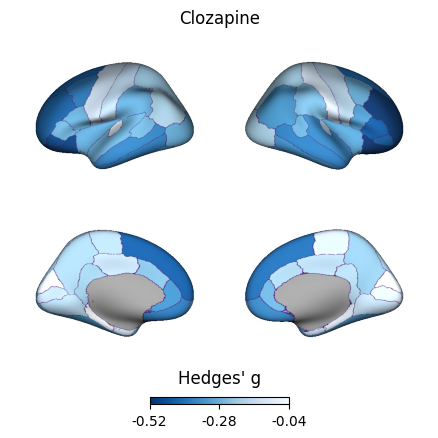

In [6]:
# plot 
surface = fetch_fsaverage(density='164k')
lh, rh = surface['inflated']
dk = {'left': np.array(lh_labels), 'right': np.array(rh_labels)} # outlines 

p = Plot(lh, rh, views=['lateral', 'medial'], zoom=1.2)
p.add_layer(pmap, cmap='Blues_r', cbar_label="Hedges' g")
p.add_layer(dk, as_outline=True, cbar=False)
  
pic = p.build()

# fix legend 
cbar_ax = pic.axes[-1]
cbar_ax.set_ylabel('')
cbar_ax.set_title("Hedges' g", pad=10);
plt.title('Clozapine')

pic.savefig(os.path.join(base_path + '/figs/Clozapine_parcelwise_hedges_g.jpg'), dpi=300, transparent=True)
